#**Modelos de Simulación Actuarial**

##Exámen 2 Aplicaciones a la Finanzas.




# **Ejercicio 1 (Proceso de Weiner)**

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

In [ ]:
# Descarga de datos de precios de AAPL
data = yf.download("AAPL", start="2022-01-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Seleccionar solo el precio de cierre
dw = data['Adj Close'].to_frame()
dw.columns = ["Cierre"]

In [ ]:
# Calcular rendimientos diarios logarítmicos
dw['rendimiento'] = np.log(dw['Cierre'] / dw['Cierre'].shift(1))

In [ ]:
# Calcular desviación estándar y media de los rendimientos
sdw = dw['rendimiento'].std()
mw = dw['rendimiento'].mean()

In [ ]:
# Último precio conocido de la acción
spot = dw['Cierre'].iloc[-1]

In [ ]:
# Número de días entre la fecha del último precio conocido y el 31 de diciembre
t = 279

# Número de trayectorias a simular
trayectorias = 100

# Número de simulaciones
n = 10

In [ ]:
# Simulación Monte Carlo
trayectorias = np.zeros((t, n))
prediccion = np.zeros(n)
for p in range(n):
    m = np.zeros((t, n))
    for k in range(n):
        trayectorias[0, k] = spot
        for paso in range(1, t):
            trayectorias[paso, k] = trayectorias[paso - 1, k] + \
                                             trayectorias[paso - 1, k] * (mw + sdw * np.random.randn())
    prediccion[p] = trayectorias[-1, :].mean()

# Precio final promedio
precio_final_promedio = prediccion.mean()

print(f"Precio final promedio: {precio_final_promedio:.2f}")

Precio final promedio: 166.45


In [ ]:
#Precio final promedio (n=10): 165.02
#Precio final promedio (n=100): 167.12
#Precio final promedio (n=1000): 168.32
#Precio final promedio (n=10000): 168.56

# **Ejercicio 2 (COX RUBINSTEIN)**

In [ ]:
from scipy.stats import binom
# Descargar datos de precios de MXN=X desde Yahoo Finance
import yfinance as yf
data = yf.download("MXN=X", start="2022-01-03", end="2024-03-29")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Seleccionar solo el precio de cierre
d1 = data['Adj Close'].to_frame()
d1.columns = ["Cierre"]


In [ ]:
# Calcular rendimientos diarios logarítmicos
d1['rendimiento'] = np.log(d1['Cierre'] / d1['Cierre'].shift(1))

In [ ]:
# Definir variables
sr = np.std(d1['rendimiento'], ddof=1) * np.sqrt(360)  # Volatilidad
mr = np.mean(d1['rendimiento'])
spot = d1['Cierre'].iloc[-1]  # Último precio de cierre conocido
strike = 19
tlr = 0.11
t = 0.25
u = np.exp(np.sqrt(t) * sr)
d = np.exp(-np.sqrt(t) * sr)
p = (np.exp(tlr * t) - d) / (u - d)
q = 1 - p


In [ ]:
# Procedimiento Arboles Binomiales Teorico
st = []
Ganancia = []
Gananciap = []
Probabilidad = []

for i in range(1, 5):
    st.append(spot * u**(3 - i + 1) * d**(i - 1))
    Ganancia.append(max(0, st[i - 1] - strike))
    Gananciap.append(max(0, strike - st[i - 1]))
    Probabilidad.append(binom.pmf(3 - i + 1, 3, p))

# Costo Opción CALL
call = sum(np.multiply(Ganancia, Probabilidad)) * np.exp(-t * tlr * 3)
print("Costo Opción CALL:", call)


Costo Opción CALL: 0.29417596381358124


In [ ]:
# Costo opción PUT
put = sum(np.multiply(Gananciap, Probabilidad)) * np.exp(-t * tlr * 3)
print("Costo opción PUT:", put)

Costo opción PUT: 1.2388940490840743


In [ ]:
# Simulación Montecarlo CALL
n = 10000  # Numero de simulaciones
gmc = np.zeros(n)
for i in range(n):
    u = np.random.uniform(0, 1)
    if u < Probabilidad[0]:
        gmc[i] = Ganancia[0] * np.exp(-t * tlr * 3)
    elif u < np.cumsum(Probabilidad)[1]:
        gmc[i] = Ganancia[1] * np.exp(-t * tlr * 3)
    elif u < np.cumsum(Probabilidad)[2]:
        gmc[i] = Ganancia[2] * np.exp(-t * tlr * 3)
    else:
        gmc[i] = Ganancia[3] * np.exp(-t * tlr * 3)
print("Resultados Finales CALL:", np.mean(gmc))

Resultados Finales CALL: 0.2927826276071859


In [ ]:
# Simulación Montecarlo PUT
n = 10000  # Numero de simulaciones
gmp = np.zeros(n)
for i in range(n):
    u = np.random.uniform(0, 1)
    if u < Probabilidad[0]:
        gmp[i] = Gananciap[0] * np.exp(-t * tlr * 3)
    elif u < np.cumsum(Probabilidad)[1]:
        gmp[i] = Gananciap[1] * np.exp(-t * tlr * 3)
    elif u < np.cumsum(Probabilidad)[2]:
        gmp[i] = Gananciap[2] * np.exp(-t * tlr * 3)
    else:
        gmp[i] = Gananciap[3] * np.exp(-t * tlr * 3)
print("Resultados Finales PUT:", np.mean(gmp))

Resultados Finales PUT: 1.2473643907919134


In [ ]:
# Resultados
print("Costo PUT:", np.mean(gmp))
print("Costo CALL:", np.mean(gmc))

Costo PUT: 1.2473643907919134
Costo CALL: 0.2927826276071859


In [ ]:
#Costo PUT (n=10):1.0201790480873876
#Costo CALL (n=10):0.48783553614082625
#Costo PUT (n=100):1.240717001798255
#Costo CALL (n=100):0.284570729415482
#Costo PUT (n=1000):1.2532578387031972
#Costo CALL (n=1000):0.2983927362728054
#Costo PUT (n=100000):1.2473643907919134
#Costo CALL (n=10000):0.2927826276071859

# **Ejercicio 3 (VAR)**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Descargar datos de precios de GFNORTEO.MX desde Yahoo Finance
import yfinance as yf
data = yf.download("GFNORTEO.MX", start="2022-01-03", end="2024-03-31")

# Seleccionar solo el precio de cierre
datos = data['Adj Close'].to_frame()
datos.columns = ["Cierre"]

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Calcular rendimientos diarios logarítmicos
datos['rendimiento'] = np.log(datos['Cierre'] / datos['Cierre'].shift(1))

In [ ]:
# Definir variables
spot = datos['Cierre'].iloc[-1]  # Último precio conocido del de la acción


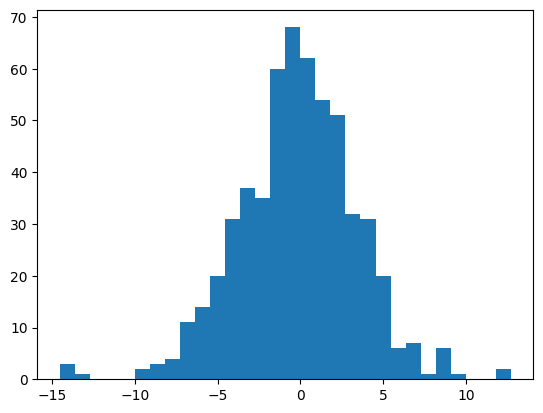

Media de lo que esperaríamos ganar/perder: -0.17618626663347586
Quantiles al 90%, 95% y 99%: [nan nan nan]


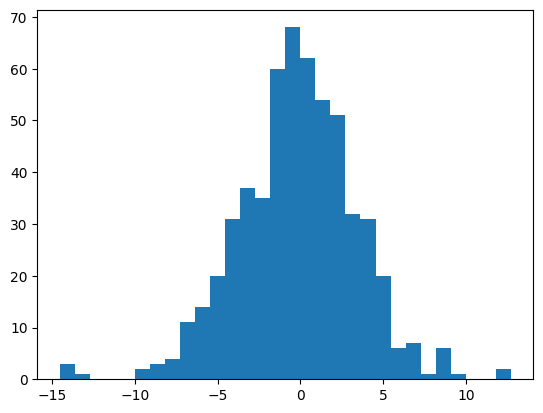

In [ ]:
# Procedimiento teórico
dvar = datos[['Cierre', 'rendimiento']].copy()
dvar['revaluacion'] = spot * np.exp(dvar['rendimiento'])
dvar['PL'] = spot - dvar['revaluacion']

plt.hist(dvar['PL'], bins=30)
plt.show()

print("Media de lo que esperaríamos ganar/perder:", np.mean(dvar['PL']))
print("Quantiles al 90%, 95% y 99%:", np.quantile(dvar['PL'], [0.90, 0.95, 0.99]))

plt.hist(dvar['PL'], bins=30)
plt.axvline(x=np.quantile(dvar['PL'], 0.95), color='red')
plt.show()

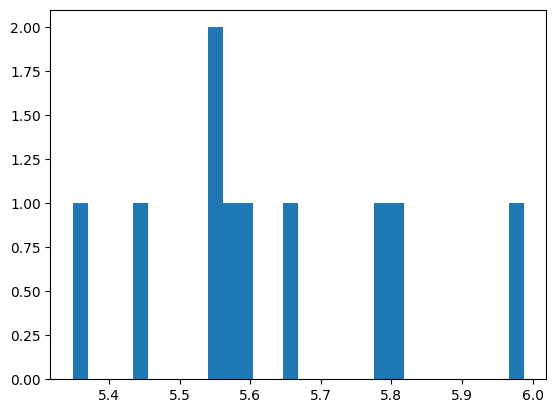

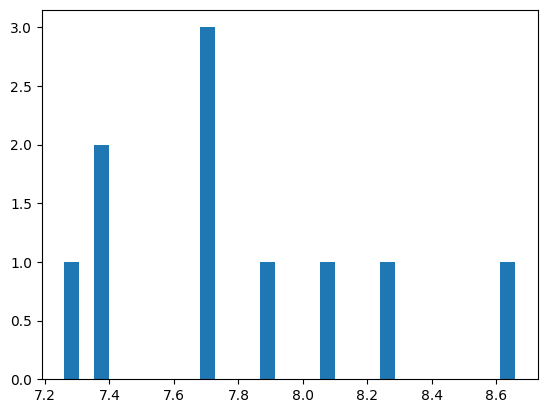

Pronóstico de VaR al 95% : 5.62998790521406
Pronóstico de VaR al 99% : 7.790104438498399


In [ ]:
# Simulación Montecarlo
dvar_mc = datos[['Cierre', 'rendimiento']].copy()
mr = np.mean(dvar['rendimiento'])
sdr = np.std(dvar['rendimiento'])

np.random.seed(30)

var_sm95 = []
var_sm99 = []
n = 10  # Numero de simulaciones

for k in range(n):
    dvar_mc['rensim'] = np.random.normal(mr, sdr, len(dvar_mc))
    dvar_mc['Revaluacion'] = spot * np.exp(dvar_mc['rensim'])
    dvar_mc['PL'] = spot - dvar_mc['Revaluacion']
    var_sm95.append(np.quantile(dvar_mc['PL'], 0.95))
    var_sm99.append(np.quantile(dvar_mc['PL'], 0.99))

plt.hist(var_sm95, bins=30)
plt.show()
plt.hist(var_sm99, bins=30)
plt.show()

print("Pronóstico de VaR al 95% :", np.mean(var_sm95))
print("Pronóstico de VaR al 99% :", np.mean(var_sm99))

In [ ]:
#Pronóstico de VaR al 95% con 10 escenarios: 5.62998790521406
#Pronóstico de VaR al 99% con 10 escenarios: 7.790104438498399
#Pronóstico de VaR al 95% con 100 escenarios: 5.584689236922845
#Pronóstico de VaR al 99% con 100 escenarios: 7.817220005964989
#Pronóstico de VaR al 95% con 1000 escenarios: 5.627861702737744
#Pronóstico de VaR al 99% con 1000 escenarios: 7.888726727645374
#Pronóstico de VaR al 95% con 10,000 escenarios: 5.620749505152351
#Pronóstico de VaR al 99% con 10,000 escenarios: 7.869457693357289

In [ ]:
# Simulación de Bootstrapping
rend_his = dvar['rendimiento'].dropna().values
rend_bootstrapping = np.random.choice(rend_his, len(rend_his), replace=True)

var_bt95 = []
var_bt99 = []
n = 10  # Simulaciones

for k in range(n):
    rend_bt = np.random.choice(rend_his, len(rend_his), replace=True)
    revaluacion_bt = spot * np.exp(rend_bt)
    pl_bt = spot - revaluacion_bt
    var_bt95.append(np.quantile(pl_bt, 0.95))
    var_bt99.append(np.quantile(pl_bt, 0.99))

print("VaR pronosticado al 95%:", np.mean(var_bt95))
print("VaR pronosticado al 99%:", np.mean(var_bt99))

VaR pronosticado al 95%: 5.0858432406446274
VaR pronosticado al 99%: 8.520827687748135


In [ ]:
#Pronóstico de VaR al 95% con 10 escenarios: 5.0858432406446274
#Pronóstico de VaR al 99% con 10 escenarios: 8.520827687748135
#Pronóstico de VaR al 95% con 100 escenarios: 5.103972507807626
#Pronóstico de VaR al 99% con 100 escenarios: 8.502412415222167
#Pronóstico de VaR al 95% con 1000 escenarios: 5.123224002111415
#Pronóstico de VaR al 99% con 1000 escenarios:  8.485280582013917
#Pronóstico de VaR al 95% con 10,000 escenarios: 5.117267837885225
#Pronóstico de VaR al 99% con 10,000 escenarios: 8.514301107718731